In [1]:
#pip installer nltk
import numpy as np 

In [2]:
#
len(open('Data/train.txt','r').readlines())

16000

In [3]:
len(open('Data/test.txt','r').readlines())


2000

In [4]:
len(open('Data/val.txt','r').readlines())


2000

In [5]:
open('Data/val.txt','r').readlines()[2]

'i feel like a faithful servant;love\n'

In [6]:
# Data read from the text files
train = open('Data/train.txt','r').readlines()
test = open('Data/test.txt','r').readlines()
val = open('Data/val.txt','r').readlines()

In [7]:
#concatenate
full_data = train+test+val

In [8]:
len(full_data)

20000

In [9]:
full_data[0].split(';')

['i didnt feel humiliated', 'sadness\n']

In [10]:
x = []
y = []
for item in full_data:
    text , label = item.split(';')
    label = label.replace('\n','')
    x.append(text)
    y.append(label)

In [16]:
x[0]

'i didnt feel humiliated'

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [34]:
stem = PorterStemmer()

In [26]:
# nltk.download('stopwords')
# stopwords.words('english')
# nltk.download('punkt')
# 

In [40]:
def text_cleaning(sentence):
    clean_text = []
    for sent in sentence:
        lower_sent = sent.lower()
        word_tokenize = nltk.word_tokenize(lower_sent)
        removed_stop_words = [word for word in word_tokenize if word not in stopwords.words('english')]
        stemmed_sent = [stem.stem(word) for word in removed_stop_words]
        clean = " ".join(stemmed_sent)
        clean_text.append(clean)
    return clean_text

In [41]:
clean_sentence = text_cleaning(x)

In [46]:
x[12]

'i think it s the easiest time of year to feel dissatisfied'

In [45]:
clean_sentence[12]

'think easiest time year feel dissatisfi'

In [42]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

In [47]:
tokenizer = Tokenizer(oov_token='<nothing>')

In [48]:
tokenizer.fit_on_texts(clean_sentence)

In [49]:
tokenizer.word_index

{'<nothing>': 1,
 'feel': 2,
 'like': 3,
 'im': 4,
 'get': 5,
 'time': 6,
 'know': 7,
 'realli': 8,
 'make': 9,
 'go': 10,
 'want': 11,
 'love': 12,
 'littl': 13,
 'think': 14,
 'peopl': 15,
 'day': 16,
 'thing': 17,
 'one': 18,
 'would': 19,
 'even': 20,
 'still': 21,
 'ive': 22,
 'life': 23,
 'bit': 24,
 'way': 25,
 'need': 26,
 'someth': 27,
 'much': 28,
 'dont': 29,
 'work': 30,
 'start': 31,
 'could': 32,
 'say': 33,
 'look': 34,
 'see': 35,
 'tri': 36,
 'back': 37,
 'good': 38,
 'pretti': 39,
 'come': 40,
 'right': 41,
 'alway': 42,
 'help': 43,
 'also': 44,
 'today': 45,
 'year': 46,
 'take': 47,
 'friend': 48,
 'use': 49,
 'around': 50,
 'cant': 51,
 'person': 52,
 'made': 53,
 'though': 54,
 'hate': 55,
 'well': 56,
 'got': 57,
 'happi': 58,
 'thought': 59,
 'someon': 60,
 'didnt': 61,
 'never': 62,
 'felt': 63,
 'find': 64,
 'write': 65,
 'lot': 66,
 'hope': 67,
 'quit': 68,
 'live': 69,
 'week': 70,
 'everi': 71,
 'sure': 72,
 'less': 73,
 'read': 74,
 'enough': 75,
 'give':

In [50]:
tokenizer.word_counts

OrderedDict([('didnt', 334),
             ('feel', 21204),
             ('humili', 69),
             ('go', 1101),
             ('hopeless', 81),
             ('damn', 54),
             ('hope', 320),
             ('around', 382),
             ('someon', 335),
             ('care', 254),
             ('awak', 22),
             ('im', 3055),
             ('grab', 22),
             ('minut', 79),
             ('post', 234),
             ('greedi', 79),
             ('wrong', 152),
             ('ever', 260),
             ('nostalg', 63),
             ('fireplac', 3),
             ('know', 1192),
             ('still', 743),
             ('properti', 5),
             ('grouchi', 35),
             ('ive', 723),
             ('littl', 932),
             ('burden', 95),
             ('late', 167),
             ('wasnt', 119),
             ('sure', 310),
             ('take', 403),
             ('milligram', 1),
             ('time', 1215),
             ('recommend', 19),
             ('amoun

In [52]:
tokenizer.document_count

20000

In [53]:
sequence = tokenizer.texts_to_sequences(clean_sentence)

In [ ]:
# ram is a good boy  -- 2  5  4  6  8
# 2   5   4  6   8

In [54]:
sequence[0]

[61, 2, 522]

In [55]:
clean_sentence[0]

'didnt feel humili'

In [72]:
sequence[1]

[10, 2, 419, 682, 67, 50, 60, 96, 1229]

In [74]:
max_len_of_sent = max(list(map(len,sequence)))
max_len_of_sent

35

In [77]:
from tensorflow.keras.utils import pad_sequences
sequences = pad_sequences(sequences=sequence,padding='post',maxlen=max_len_of_sent)

In [81]:
sequences

array([[  61,    2,  522, ...,    0,    0,    0],
       [  10,    2,  419, ...,    0,    0,    0],
       [   4, 1230,  431, ...,    0,    0,    0],
       ...,
       [   2,  194,  157, ...,    0,    0,    0],
       [ 328,    2,  175, ...,    0,    0,    0],
       [   2,    3,  916, ...,    0,    0,    0]])

In [86]:
import pandas as pd 
unique_label = list(pd.Series(y).unique())
unique_label

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [88]:
label_dict = {
    'sadness':0,
    'anger':1,
    'love':2,
    'surprise':3,
    'fear':4,
    'joy':5
}
label_dict

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

In [91]:
label_dict['sadness']

0

In [93]:
import numpy as np
def label_encoder(ls_of_labels):
    label = []
    for lav in y:
        label.append(label_dict[lav])
    label = np.array(label)
    return label

In [98]:
label = label_encoder(y)
label

array([0, 0, 1, ..., 5, 5, 5])

In [101]:
y = label
x = sequences

In [106]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [121]:
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM
from tensorflow.keras.models import  Sequential

In [123]:
x_train.shape

(16000, 35)

In [124]:
unique_label

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [125]:
#RNN model
model = Sequential()
model.add(SimpleRNN(30,input_shape=(35,1), return_sequences=False))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 30)                960       
                                                                 
 dense_2 (Dense)             (None, 6)                 186       
                                                                 
Total params: 1146 (4.48 KB)
Trainable params: 1146 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
500/500 [==============================] - 7s 13ms/step - loss: 1.5784 - accuracy: 0.3321
Epoch 2/5
500/500 [==============================] - 6s 13ms/step - loss: 1.5772 - accuracy: 0.3358
Epoch 3/5
500/500 [==============================] - 6s 13ms/step - loss: 1.5771 - accuracy: 0.3354
Epoch 4/5
500/500 [==============================] - 9s 18ms/step - loss: 1.5765 - accuracy: 0.3348
Epoch 5/5
500/500 [==============================] - 7s 14ms/step - loss: 1.5770 - accuracy: 0.3317


In [128]:
model.evaluate(x_train,y_train)

500/500 [==============================] - 8s 13ms/step - loss: 1.5750 - accuracy: 0.3376


[1.5749900341033936, 0.33762499690055847]

In [129]:
model.evaluate(x_test,y_test)


125/125 [==============================] - 2s 12ms/step - loss: 1.5724 - accuracy: 0.3430


[1.57242751121521, 0.34299999475479126]

In [131]:
print(LSTM.__doc__)

Long Short-Term Memory layer - Hochreiter 1997.

    See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
    for details about the usage of RNN API.

    Based on available runtime hardware and constraints, this layer
    will choose different implementations (cuDNN-based or pure-TensorFlow)
    to maximize the performance. If a GPU is available and all
    the arguments to the layer meet the requirement of the cuDNN kernel
    (see below for details), the layer will use a fast cuDNN implementation.

    The requirements to use the cuDNN implementation are:

    1. `activation` == `tanh`
    2. `recurrent_activation` == `sigmoid`
    3. `recurrent_dropout` == 0
    4. `unroll` is `False`
    5. `use_bias` is `True`
    6. Inputs, if use masking, are strictly right-padded.
    7. Eager execution is enabled in the outermost context.

    For example:

    >>> inputs = tf.random.normal([32, 10, 8])
    >>> lstm = tf.keras.layers.LSTM(4)
    >>> output = lstm(inputs)


In [ ]:
# text to number
# 1. Bag of word
# 2. Tfidf
# 3. word embedding



In [134]:
## LSTM  MODEL Definining
model2 = Sequential()
model2.add(LSTM(units=64,input_shape=(35,1),return_sequences=True))
model2.add(LSTM(units=32))
model2.add(Dense(units=25,activation='tanh'))
model2.add(Dense(6,activation='softmax'))  #<-- OUTPUT LAYER

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 35, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 25)                825       
                                                                 
 dense_5 (Dense)             (None, 6)                 156       
                                                                 
Total params: 30293 (118.33 KB)
Trainable params: 30293 (118.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
history = model2.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
500/500 [==============================] - 32s 48ms/step - loss: 1.5847 - accuracy: 0.3289 - val_loss: 1.5733 - val_accuracy: 0.3473
Epoch 2/5
500/500 [==============================] - 21s 42ms/step - loss: 1.5785 - accuracy: 0.3308 - val_loss: 1.5761 - val_accuracy: 0.2910
Epoch 3/5
500/500 [==============================] - 25s 50ms/step - loss: 1.5773 - accuracy: 0.3298 - val_loss: 1.5696 - val_accuracy: 0.3515
Epoch 4/5
500/500 [==============================] - 24s 48ms/step - loss: 1.5766 - accuracy: 0.3341 - val_loss: 1.5683 - val_accuracy: 0.3515
Epoch 5/5
500/500 [==============================] - 23s 45ms/step - loss: 1.5765 - accuracy: 0.3329 - val_loss: 1.5699 - val_accuracy: 0.3528


In [136]:

import pandas as pd 
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.584744,0.328875,1.573350,0.34725
1,1.578460,0.330813,1.576056,0.29100
2,1.577330,0.329812,1.569554,0.35150
3,1.576630,0.334062,1.568255,0.35150
4,1.576463,0.332875,1.569869,0.35275


<Axes: >

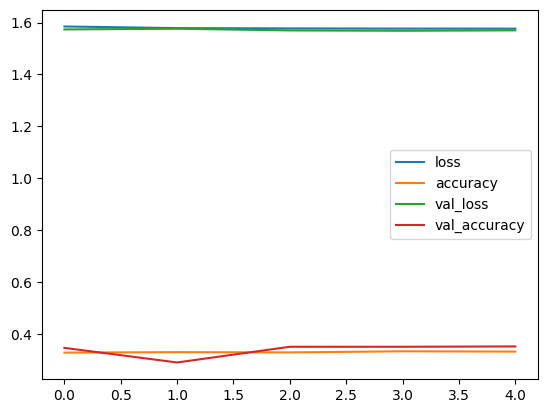

In [137]:
import pandas as pd 
pd.DataFrame(history.history).plot()

In [138]:
model2.evaluate(x_test,y_test)

125/125 [==============================] - 3s 21ms/step - loss: 1.5699 - accuracy: 0.3528


[1.569868564605713, 0.3527500033378601]

In [139]:
pred = model2.predict(x_test)

125/125 [==============================] - 6s 21ms/step


In [143]:
prediction  = np.argmax(pred,axis=1)
prediction

array([5, 0, 5, ..., 5, 0, 5], dtype=int64)

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.34      0.33      0.34      1146
           1       0.00      0.00      0.00       543
           2       0.00      0.00      0.00       317
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       471
           5       0.36      0.75      0.48      1376

    accuracy                           0.35      4000
   macro avg       0.12      0.18      0.14      4000
weighted avg       0.22      0.35      0.26      4000



c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera